<img src="https://www.nvidia.com/content/dam/en-zz/Solutions/about-nvidia/logo-and-brand/01-nvidia-logo-horiz-500x200-2c50-d@2x.png" alt="NVIDIA Logo" style="width: 300px; height: auto;">


---


# Lab 2: Installing and Running AI Software

## Lab Overview

### Audience
The workbook is intended for technical training students.

### Objectives
In this practice, you will:

    ✓ Install the NVIDIA Container Toolkit on a server
    ✓ Run a container from NGC to train and recognize handwritten numbers

### Prerequisites and Guidelines
There are no prerequisites for this lab.

### Notice
Please follow the instructions below carefully to successfully complete the practice.
If you encounter technical issues, please contact the NVIDIA Networking Academy team:
nbu-academy-support@nvidia.com

---


## Practice 1: Install the Container Toolkit


Practice objectives:

In this exercise, you will install the NVIDIA Container Toolkit and check if the toolkit is installed and working properly by running a container.


### Task 1: Install the Container Toolkit


#### 1.1 - Configure a production repository:


In [37]:
!curl -fsSL https://nvidia.github.io/libnvidia-container/gpgkey \
    | sudo gpg --dearmor --yes -o /usr/share/keyrings/nvidia-container-toolkit-keyring.gpg \
  && curl -s -L https://nvidia.github.io/libnvidia-container/stable/deb/nvidia-container-toolkit.list \
    | sed 's#deb https://#deb [signed-by=/usr/share/keyrings/nvidia-container-toolkit-keyring.gpg] https://#g' \
    | sudo tee /etc/apt/sources.list.d/nvidia-container-toolkit.list > /dev/null

#### 1.2 - Update the packages list from the repository:


In [38]:
!sudo apt-get update

Get:1 file:/var/nvidia-driver-local-repo-ubuntu2404-580.105.08  InRelease [1572 B]
Hit:2 http://us-east4.gce.archive.ubuntu.com/ubuntu jammy InRelease
Get:1 file:/var/nvidia-driver-local-repo-ubuntu2404-580.105.08  InRelease [1572 B]
Hit:3 http://us-east4.gce.archive.ubuntu.com/ubuntu jammy-updates InRelease    
Hit:4 http://us-east4.gce.archive.ubuntu.com/ubuntu jammy-backports InRelease  
Hit:5 https://nvidia.github.io/libnvidia-container/stable/deb/amd64  InRelease 
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://download.docker.com/linux/ubuntu jammy InRelease                 
Hit:8 https://apt.grafana.com stable InRelease                                 
Hit:9 https://repos.influxdata.com/debian stable InRelease                     
Hit:10 https://cli.github.com/packages stable InRelease                        
Hit:11 http://security.ubuntu.com/ubuntu jammy-security InRelease              
Reading package lists... Done


#### 1.3 - Install the NVIDIA Container Toolkit packages:


In [39]:
!sudo apt-get install -y nvidia-container-toolkit

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
nvidia-container-toolkit is already the newest version (1.18.0-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


#### 1.4 - Configure a container runtime to enable support for NVIDIA GPUs via the NVIDIA Container Toolkit:


In [40]:
!sudo nvidia-ctk runtime configure

INFO[0000] Loading config from /etc/docker/daemon.json  
INFO[0000] Wrote updated config to /etc/docker/daemon.json 
INFO[0000] It is recommended that docker daemon be restarted. 


#### 1.5 - Restart the Docker service:


In [41]:
!sudo systemctl restart docker

---


### Task 2: Run the NVIDIA Container Toolkit


#### 2.1 - Run a container and check if the NVIDIA Container Toolkit operates as expected:


In [42]:
!sudo docker run --rm --runtime=nvidia --gpus all ubuntu nvidia-smi

Tue Nov 25 17:01:13 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.195.03             Driver Version: 570.195.03     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      On  |   00000000:00:03.0 Off |                    0 |
| N/A   46C    P8             17W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

#### Your output should render the NVIDIA-SMI table without error

#### Task 2 Questions:

    ✓ What command is executed in the container?
    ✓ What is the driver version in your output?
    ✓ What is the CUDA version in your output?

---


## Practice 2: Docker Container


Practice objectives:

In this exercise you will use a Docker container with an NVIDIA GPU to build a simple neural network to recognize a numeral digit from an image file.

This exercise assumes that the previous exercise "Install Container Toolkit" was completed successfully.


### Task 1: Install and Run PyTorch Docker Container


#### 1.1 - Run the following command to install a container:


In [43]:
!sudo docker pull nvcr.io/nvidia/pytorch:25.01-py3

25.01-py3: Pulling from nvidia/pytorch
Digest: sha256:96990c82825613c3bdeebb66675c7c91b0123f64a5895623316dc5b824e0d7a9
Status: Image is up to date for nvcr.io/nvidia/pytorch:25.01-py3
nvcr.io/nvidia/pytorch:25.01-py3


---


### Task 2: Prepare Program Code Files for Training


The following code will train a model to recognize a numeral in a 24x24 pixel image.

Navigate to the `~/notebooks/module8` directory, which contains the following files:

    ✓ train.py – Program that trains the AI
    ✓ test.py – Program that uses the trained AI
    ✓ 2.png, 7.png and 8.png – Image files used to test the AI

You can create a few 24x24 pixel images using software like MS Paint, writing a number in each image, or using files downloaded from GitHub. In our example, these are the images we used with significant magnification:


In [44]:
!ls ~/notebooks/module8/

2.png  7.png  8.png  data  mnist_cnn.pt  test.py  timer.py  train.py


---


### Task 3: Train the Model


#### 3.1 - Before you start training your model, run nvidia-smi and make sure to remember or write down the following information:

    ✓ The GPU's memory usage before training begins
    ✓ The current GPU utilization
    ✓ The list of processes currently running on the GPU

Retain these details for later reference.

In [45]:
!nvidia-smi

Tue Nov 25 17:01:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.195.03             Driver Version: 570.195.03     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      On  |   00000000:00:03.0 Off |                    0 |
| N/A   46C    P0             19W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

#### 3.2 - Run the training using the command "python train.py". During the training, several epochs will run:

**Note:** This command will start the training script in the container we generated. It should output each epoch with the relevant stats.

In [46]:
!sudo docker run --gpus all --ipc=host --rm -v /home/ubuntu/module8/materials:/workspace -w /workspace nvcr.io/nvidia/pytorch:25.01-py3 python -u train.py 1 | tee /tmp/gpu_train.txt


== PyTorch ==

NVIDIA Release 25.01 (build 134983853)
PyTorch Version 2.6.0a0+ecf3bae
Container image Copyright (c) 2025, NVIDIA CORPORATION & AFFILIATES. All rights reserved.
Copyright (c) 2014-2024 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

Various files include modifications (c) NVIDIA CORPORATION & AFFILIATES.  All rights reserved.

This co

#### 3.3 - While your model is training, run the nvidia-smi command in a terminal in a new tab.

To open a new terminal, click the **+** button in JupyterLab and select **Terminal** from the Launcher:

<div style="text-align: center;">
  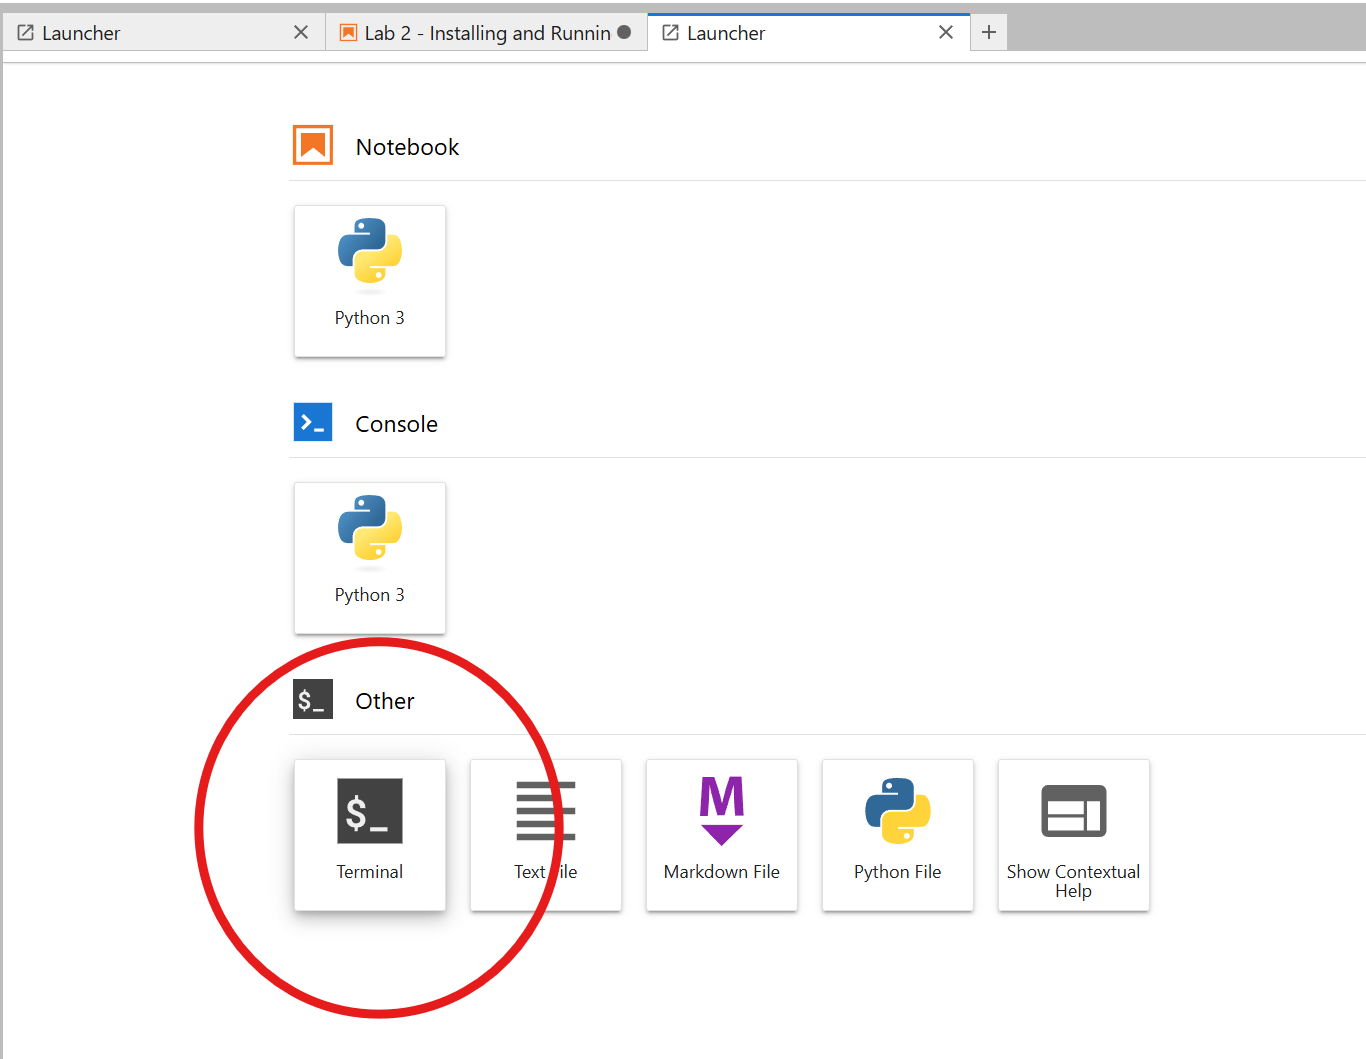
</div>

Compare the current output to what you observed before starting the training. Take note of the following:

    ✓ What was the GPU memory usage during training, compared to before you started?
    ✓ How did GPU utilization change during training?
    ✓ Which processes were running on the GPU during training?
    ✓ How much time did the model training take to complete?

---


We will import a simple helper script called `timer` that will compare GPU vs CPU performance at the end of this lab.


In [47]:
from scripts import timer

### Task 4: Try the Trained Model


#### 4.1 - Use the test.py file to check if the trained model can recognize the numerals from the image files. 

By default, test.py will attempt to recognize the numeral in the file 7.png. To test a different file, provide its name as a parameter.

**Note:** These commands should be run from within the Docker container.

In [48]:
!sudo docker run --gpus all --ipc=host --rm -v /home/ubuntu/module8/materials:/workspace -w /workspace nvcr.io/nvidia/pytorch:25.01-py3 python -u test.py | tee /tmp/gpu_7.txt


== PyTorch ==

NVIDIA Release 25.01 (build 134983853)
PyTorch Version 2.6.0a0+ecf3bae
Container image Copyright (c) 2025, NVIDIA CORPORATION & AFFILIATES. All rights reserved.
Copyright (c) 2014-2024 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

Various files include modifications (c) NVIDIA CORPORATION & AFFILIATES.  All rights reserved.

This co

#### 4.2 - Test with a different image file:

In [49]:
!sudo docker run --gpus all --ipc=host --rm -v /home/ubuntu/module8/materials:/workspace -w /workspace nvcr.io/nvidia/pytorch:25.01-py3 python -u test.py 8.png | tee /tmp/gpu_8.txt


== PyTorch ==

NVIDIA Release 25.01 (build 134983853)
PyTorch Version 2.6.0a0+ecf3bae
Container image Copyright (c) 2025, NVIDIA CORPORATION & AFFILIATES. All rights reserved.
Copyright (c) 2014-2024 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

Various files include modifications (c) NVIDIA CORPORATION & AFFILIATES.  All rights reserved.

This co

---


### Task 5: Compare the Load on GPU vs CPU


#### 5.1 - Test Inference using CPU rather than GPU

**Note:** The `--gpus all` flag has been removed. The container will now run CPU-only, without utilizing the GPU.

In [50]:
!sudo docker run --ipc=host --rm -e CUDA_VISIBLE_DEVICES= -v /home/ubuntu/module8/materials:/workspace -w /workspace nvcr.io/nvidia/pytorch:25.01-py3 python -u test.py | tee /tmp/cpu_7.txt


== PyTorch ==

NVIDIA Release 25.01 (build 134983853)
PyTorch Version 2.6.0a0+ecf3bae
Container image Copyright (c) 2025, NVIDIA CORPORATION & AFFILIATES. All rights reserved.
Copyright (c) 2014-2024 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

Various files include modifications (c) NVIDIA CORPORATION & AFFILIATES.  All rights reserved.

This co

#### 5.2 - The previously used files should still be in the container. Start training the model again.

**Question:** How much time did the model training take compared to GPU training?


In [ ]:
!sudo docker run --ipc=host --rm -e CUDA_VISIBLE_DEVICES= -v /home/ubuntu/module8/materials:/workspace -w /workspace nvcr.io/nvidia/pytorch:25.01-py3 python -u train.py 1 | tee /tmp/cpu_train.txt


== PyTorch ==

NVIDIA Release 25.01 (build 134983853)
PyTorch Version 2.6.0a0+ecf3bae
Container image Copyright (c) 2025, NVIDIA CORPORATION & AFFILIATES. All rights reserved.
Copyright (c) 2014-2024 Facebook Inc.
Copyright (c) 2011-2014 Idiap Research Institute (Ronan Collobert)
Copyright (c) 2012-2014 Deepmind Technologies    (Koray Kavukcuoglu)
Copyright (c) 2011-2012 NEC Laboratories America (Koray Kavukcuoglu)
Copyright (c) 2011-2013 NYU                      (Clement Farabet)
Copyright (c) 2006-2010 NEC Laboratories America (Ronan Collobert, Leon Bottou, Iain Melvin, Jason Weston)
Copyright (c) 2006      Idiap Research Institute (Samy Bengio)
Copyright (c) 2001-2004 Idiap Research Institute (Ronan Collobert, Samy Bengio, Johnny Mariethoz)
Copyright (c) 2015      Google Inc.
Copyright (c) 2015      Yangqing Jia
Copyright (c) 2013-2016 The Caffe contributors
All rights reserved.

Various files include modifications (c) NVIDIA CORPORATION & AFFILIATES.  All rights reserved.

This co

In [ ]:
timer.summary()